## Descrição dos Dados

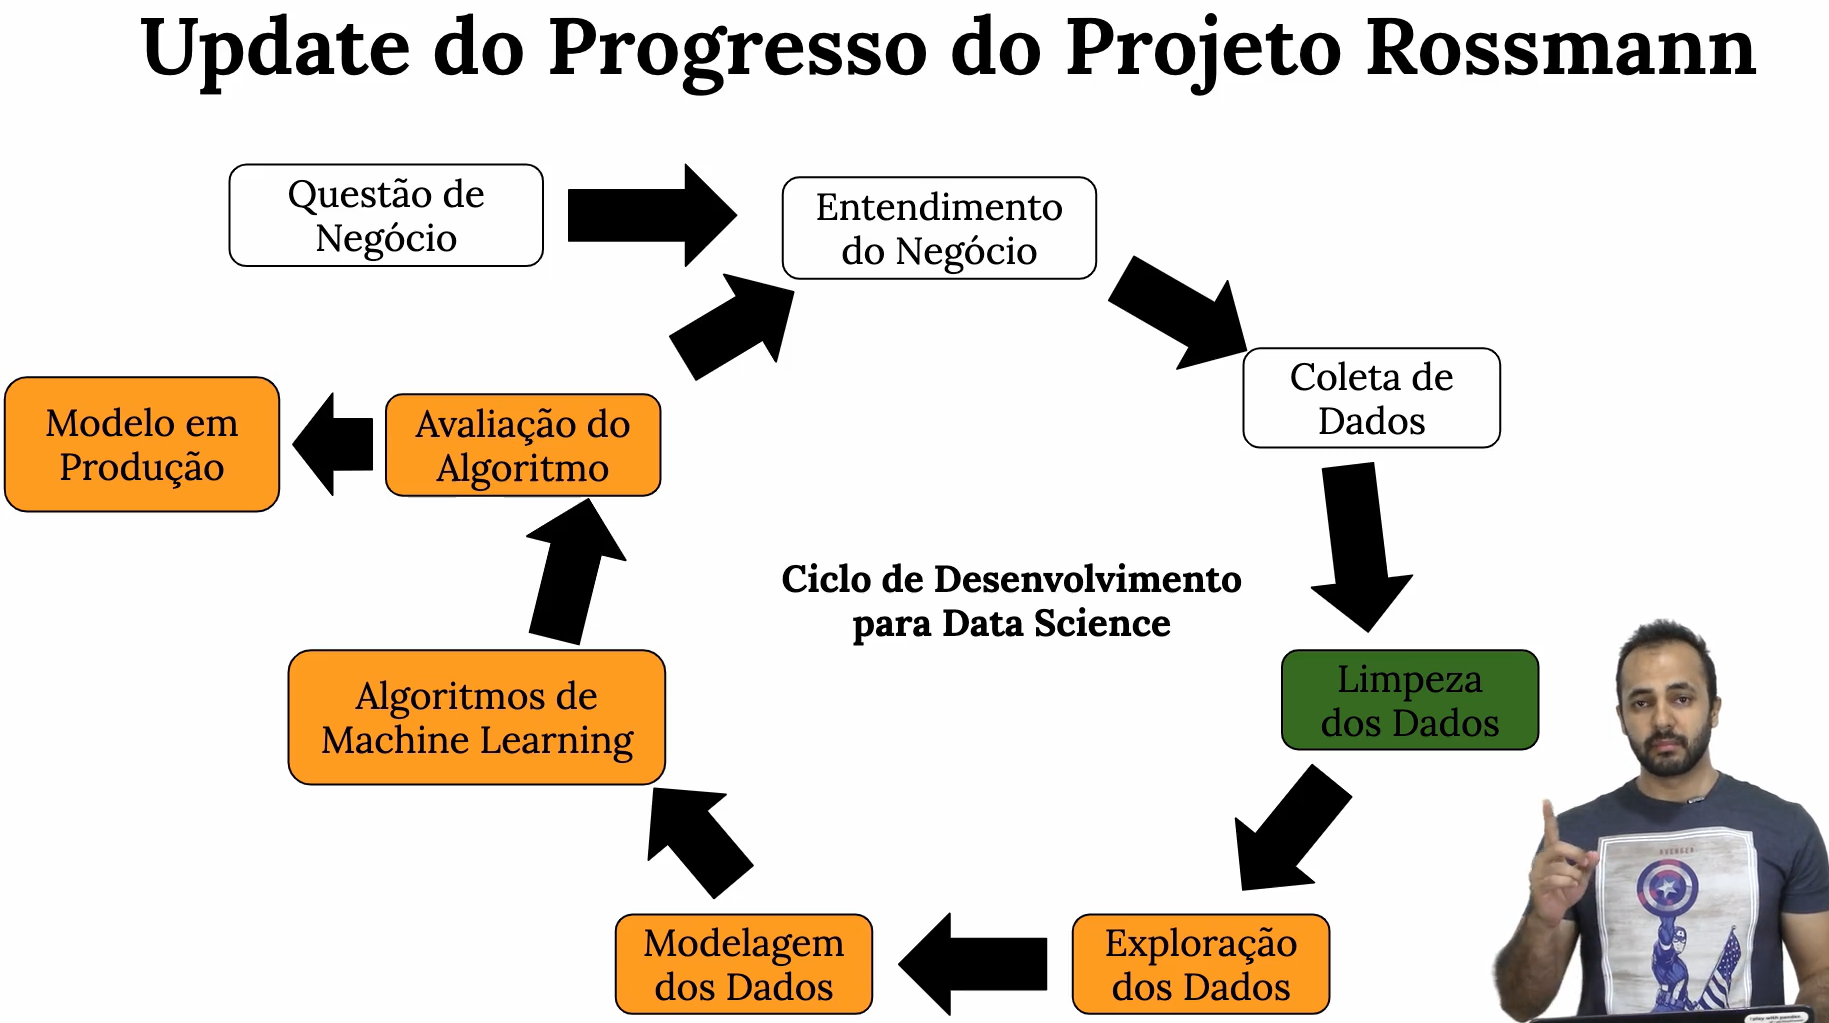


### Qual a motivação da descrição dos dados?
__Para saber o quão desafiador é o poroblama que eu estou lidando!__

# 0.0 Imports

In [21]:
import pandas as pd
import numpy as np
import inflection
import math
import datetime


import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML
from IPython.display import Image

## 0.1 Helper Functions

## 0.2 Loading Data

In [2]:
df_sales_raw = pd.read_csv( 'data/train.csv', low_memory = False)
df_store_raw = pd.read_csv( 'data/store.csv', low_memory = False)

# merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how = 'left', on = 'Store')

df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1011891,257,6,2013-01-05,2997,344,1,0,0,0,a,a,420.0,12.0,2012.0,0,NaN,NaN,NaN


# 1.0 Data Description

## 1.1 Rename Columns

In [3]:
df1 = df_raw.copy()

In [4]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
           'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 
            'PromoInterval']

snake_case = lambda x:  inflection.underscore( x ) # convert cammel casa para snake case
cols_new = list( map( snake_case, cols_old))

df1.columns = cols_new
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2 Data Dimensions

In [5]:
print('Number of rows = {}'.format(df1.shape[0]))
print('Number of columns = {}'.format(df1.shape[1]))

Number of rows = 1017209
Number of columns = 18


## 1.3 Data Typers

In [6]:
df1['date'] = pd.to_datetime( df1['date'] )
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check NA

In [7]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Fillout NA

In [8]:
# competition_distance --> fill naby a very large distance 
df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 5*df1['competition_distance'].max() if math.isnan( x ) else x)
# competition_open_since_month  
df1['competition_open_since_month'] = df1.apply( lambda x: x['date'].month if math.isnan( x['competition_open_since_month'] ) else x['competition_open_since_month'], axis = 1 )  
# competition_open_since_year    
df1['competition_open_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['competition_open_since_year'] ) else x['competition_open_since_year'], axis = 1 )  
# promo2_since_week   
df1['promo2_since_week'] = df1.apply( lambda x: x['date'].week if math.isnan( x['promo2_since_week'] ) else x['promo2_since_week'], axis = 1 )  
# promo2_since_year
df1['promo2_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['promo2_since_year'] ) else x['promo2_since_year'], axis = 1 )
# promo_interval
month_map = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

df1['promo_interval'].fillna(0, inplace = True)

df1['month_map'] = df1['date'].dt.month.map( month_map )

df1['is_promo'] = df1[['promo_interval','month_map']].apply(lambda x: 0 if x['promo_interval'] == 0  else 1 if x['month_map'] in x['promo_interval'].split( ',' ) else 0, axis = 1 )

In [9]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6 Change Types

In [10]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int )
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( int )

df1['promo2_since_week'] = df1['promo2_since_week'].astype( int )
df1['promo2_since_year'] = df1['promo2_since_year'].astype( int )

## 1.7 Descriptive Statistical

In [11]:
# Split the dateframe into two subset. One quantitative and another categorical.
num_atributes = df1.select_dtypes(include = ['int64', 'float64'] )
cat_atributes = df1.select_dtypes(exclude = ['int64', 'float64', 'datetime64[ns]' ] )

### 1.7.1 Quantitative Attributes

In [12]:
# Central Tendence - mean and median
ct1 = pd.DataFrame( num_atributes.apply( np.mean )).T
ct2 = pd.DataFrame( num_atributes.apply( np.median )).T

# Dispersion - std, min, max, range, skew kurtosis
d1 = pd.DataFrame( num_atributes.apply ( np.std )).T
d2 = pd.DataFrame( num_atributes.apply ( min )).T 
d3 = pd.DataFrame( num_atributes.apply ( max )).T 
d4 = pd.DataFrame( num_atributes.apply ( lambda x: x.max() - x.min() )).T 
d5 = pd.DataFrame( num_atributes.apply (lambda x: x.skew() )).T 
d6 = pd.DataFrame( num_atributes.apply ( lambda x: x.kurtosis() )).T 

# Concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6 ] ).T.reset_index()
m.columns = [ 'attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,379300.0,379280.0,6401.139107,2330.0,20529.887501,15.699494,280.001870
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


### 1.7.2 Categorical Attributes

In [13]:
cat_atributes.apply( lambda x: x.unique().shape[0] ).T

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

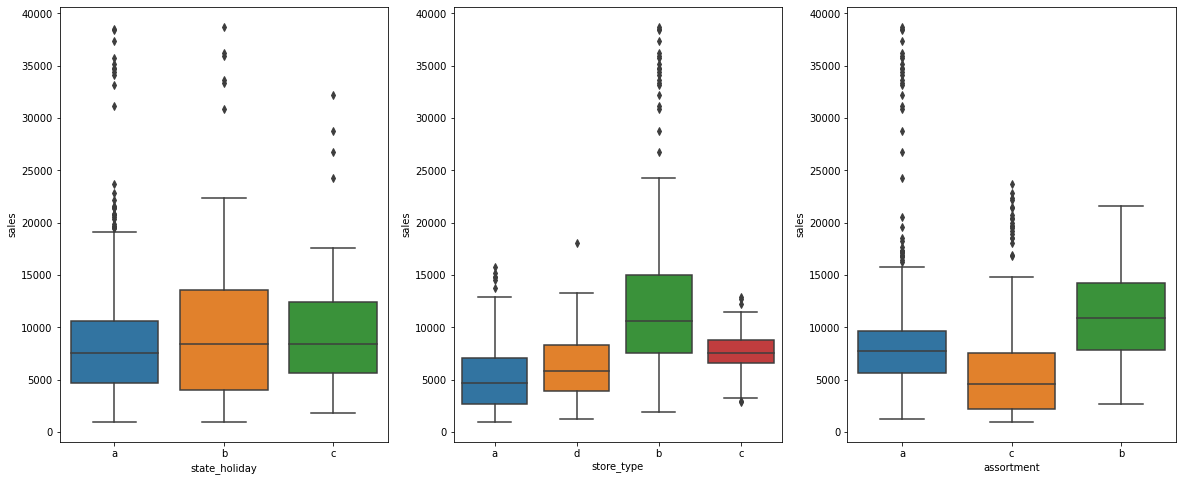

In [14]:
aux1 = df1[( df1['state_holiday'] != '0' ) & (df1['sales'] > 0)]
plt.figure( figsize = (20, 8))
plt.subplot(1,3,1)
sns.boxplot( x = 'state_holiday', y = 'sales', data = aux1)

plt.subplot(1,3,2)
sns.boxplot( x = 'store_type', y = 'sales', data = aux1)

plt.subplot(1,3,3)
sns.boxplot( x = 'assortment', y = 'sales', data = aux1)

# 2.0 Passo 02 - FEATURE ENGINEERING

**Por que?** Para ter as variáveis disponíveis para estudo durante a análise exploratória de dados.

In [15]:
df2 = df1.copy()

## 2.1 Miding Map Hypothesis

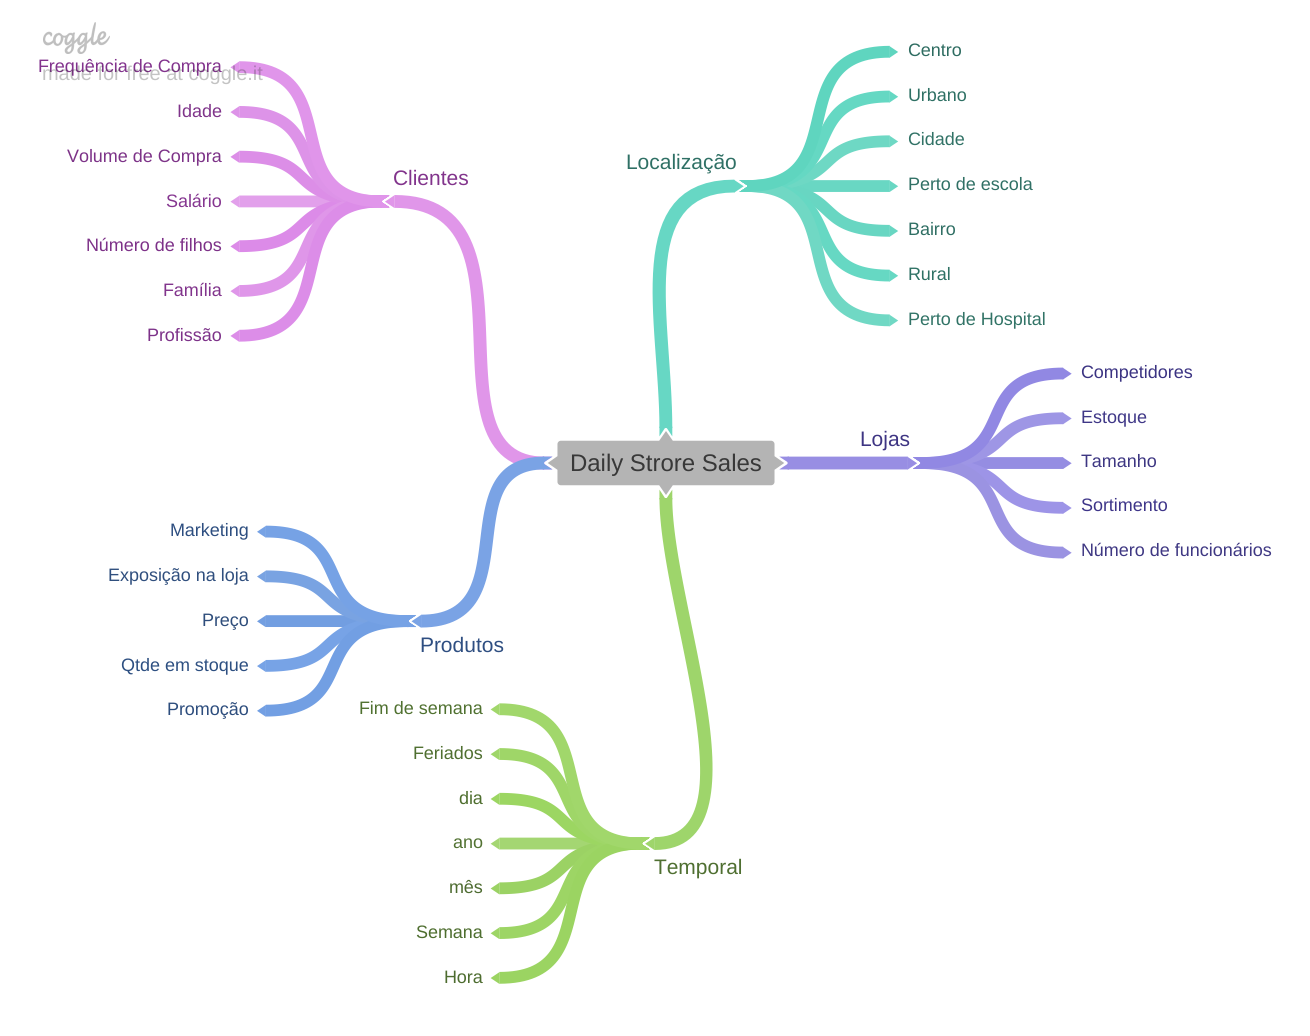

In [16]:
Image('img/Mind_maps_Hypothesis.png')

## 2.2 Hypothesis Criation

### 2.2.1 Store Hypothesis

**1.** Sotores with higher number of employes should have more sales

**2.** Sotores with higher storage capacity should have more sales

**3.** The bigest sotores should have more sales

**4.** Sotores with higher sortmment should have more sales

**5.** Sotores closest competitors should have less sales

**6.** Sotores with long term competitors should have more sales

### 2.2.2 Product Hypothesis

**1.** Stores with higher marketing investiments should have more sales.

**2.** Stores with higher products exposition should have more sales.

**3.** Stores with higher marketing investiments should have more sales.

**4.** Stores with products lower prices should have more sales.

**5.** Stores with agressive promo (more discounts) should have more sales.

**6.** Stores with long term promo should have more sales.

**7.** Stores with consecutive promos should have more sales.

### 2.2.3 Time Hypothesis

**1.** Openned stores during the christmans holydar should have more sales

**2.** The sales should increase along years

**3.** The sales should be higher in the second semestrer of the year

**4.** The sales should be higher in days after 10.

**5.** The sales shuould be lower in the weekends.

**6.** The sales shuould be lower in schools holydays.

### 2.2.4 Final Hypothesis list
The final hypothesis list must include the easiest test hypothesis. A simple criterio for that is select hypotesis that you have the data.


**4.** Sotores with higher  should have more sales

**5.** Sotores closest competitors should have less sales

**6.** Sotores with long term competitors should have more sales

**5.** Stores with agressive promo (more discounts) should have more sales.

**6.** Stores with long term promo should have more sales.

**7.** Stores with consecutive promos should have more sales.

**1.** Openned stores during the christmans holydar should have more sales

**2.** The sales should increase along years

**3.** The sales should be higher in the second semestrer of the year

**4.** The sales should be higher in days after 10.

**5.** The sales shuould be lower in the weekends.

**6.** The sales shuould be lower in schools holydays.

### 2.2.5 Feature Engineering

In [44]:
# year
df2['year'] = df2['date'].dt.year

# monthy
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2['date'].dt.weekofyear

# year week
df2['year_week'] = df2['date'].dt.strftime( '%Y-%W' )

# competition since
df2['competition_since'] = df2.apply( lambda x: datetime.datetime( year = x['competition_open_since_year'], month = x['competition_open_since_month'], day = 1), axis = 1)
df2['competition_time_month'] = ( (df2['date'] -  df2['competition_since'])/30 ).apply(lambda x: x.days).astype ( int )

# promo since
df2['promo_since'] = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str )
df2['promo_since'] = df2['promo_since'].apply( (lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta( days = 7)))
df2['promo_week'] = ((df2['date'] - df2['promo_since'])/7).apply(lambda x: x.days).astype( int )

# assortiment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

# state holiday
df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public holiday' if x == 'a' else 'Easter holiday' if x == 'b' else 'Christmas' if x == '0' else 'Regular day')

/tmp/ipykernel_34770/3089394937.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df2['week_of_year'] = df2['date'].dt.weekofyear


In [43]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,Christmas,Christmas,Christmas,Christmas,Christmas
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


# 3.0 Passo 03 - VARIABLES FILTERING

**Por que?** Para ter as variáveis disponíveis para estudo durante a análise exploratória de dados.

In [45]:
df3 = df2.copy()

## 3.1 Filtragem de linhas

In [49]:
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]

## 3.2 Seleção de colunas

In [51]:
cols_drop = ['customers', 'open']
df3.drop(cols_drop, axis = 1)

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_week
0,1,5,2015-07-31,5263,1,Regular day,1,c,extended,1270.0,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,1,Regular day,1,a,extended,570.0,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,1,Regular day,1,a,extended,14130.0,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1,Regular day,1,c,extended,620.0,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,1,Regular day,1,a,extended,29910.0,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,0,Regular day,1,b,extended,150.0,...,0,2013,1,1,1,2013-00,2006-09-01,77,2012-12-31,0
1016827,733,2,2013-01-01,10765,0,Regular day,1,b,extended,860.0,...,0,2013,1,1,1,2013-00,1999-10-01,161,2012-12-31,0
1016863,769,2,2013-01-01,5035,0,Regular day,1,b,extended,840.0,...,1,2013,1,1,1,2013-00,2013-01-01,0,2012-11-19,6
1017042,948,2,2013-01-01,4491,0,Regular day,1,b,extended,1430.0,...,0,2013,1,1,1,2013-00,2013-01-01,0,2012-12-31,0
